In [2]:
import numpy as np
import matplotlib.pyplot as plt

import scipy

from mat2list4LaminarData import EEG4Laminar

In [6]:
data = scipy.io.loadmat("v1_laminar.mat")
eeg = EEG4Laminar(data)

In [25]:
channel = 6

signal = np.mean(eeg.csddata[channel,:,:], axis=1)

fwhm = .01
gtime = np.arange(-1,1,1/eeg.srate)
gau = np.exp(-(4*np.log(2)*gtime**2) / (fwhm**2))
gau = gau / np.sum(gau)

C:\Users\kerem\AppData\Local\Temp\ipykernel_10428\3458724918.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gtime = np.arange(-1,1,1/eeg.srate)


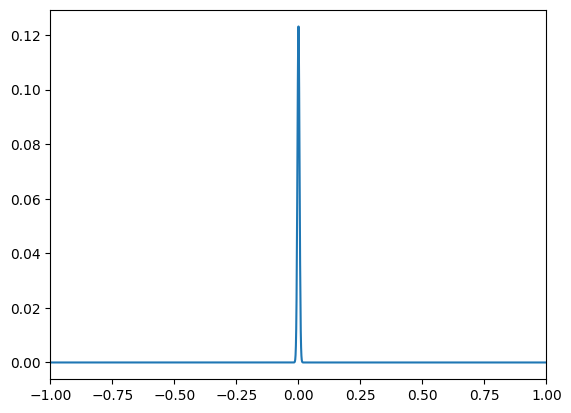

In [26]:
plt.plot(gtime, gau)
plt.xlim([-1,1])
plt.show()

In [56]:
ndata = len(signal)
nkern = len(gau)
nConv = ndata + nkern - 1
halfK = int(np.floor(nkern/2))

dataX = scipy.fft.fft(signal, nConv)
kernX = scipy.fft.fft(gau, nConv)

convresX = dataX * kernX

convres = scipy.fft.ifft(convresX)

convres = convres[halfK:-1-halfK+2]



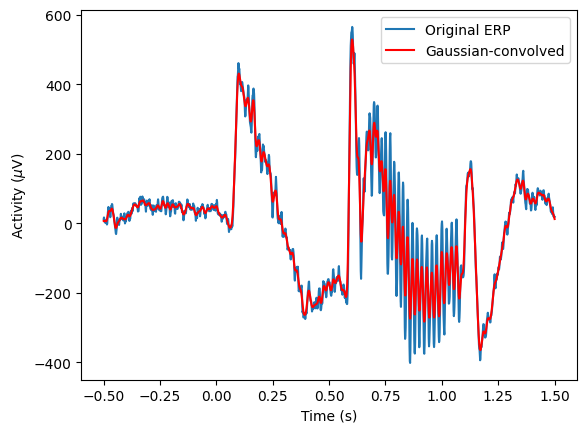

In [59]:
plt.plot(eeg.timevec.T, signal, label="Original ERP")
plt.plot(eeg.timevec.T, convres, "r", label="Gaussian-convolved")
plt.xlabel("Time (s)")
plt.ylabel("Activity ($\mu$V)")
plt.legend()
plt.show()